In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings_data = pd.read_csv('/content/drive/MyDrive/Classroom/DS304 Visualization (Aug - Nov 2024) DSAI/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
items_data = pd.read_csv('/content/drive/MyDrive/Classroom/DS304 Visualization (Aug - Nov 2024) DSAI/ml-100k/u.item', sep='|', encoding='ISO-8859-1', names=['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'])
user_data = pd.read_csv('/content/drive/MyDrive/Classroom/DS304 Visualization (Aug - Nov 2024) DSAI/ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip code'])

In [ ]:
ratings_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
items_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
user_data.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
item_id_count = ratings_data['item_id'].nunique()
movie_id_count = items_data['movie_id'].nunique()

print("item_id count:", item_id_count)
print("movie_id count:", movie_id_count)

item_id count: 1682
movie_id count: 1682


In [ ]:
merged_data = pd.merge(ratings_data, items_data, left_on='item_id', right_on='movie_id', how='inner')

In [ ]:
data = pd.merge(merged_data, user_data, on='user_id', how='inner')

In [ ]:
data.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code,genres
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,49,M,writer,55105,[Comedy]
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,0,1,0,0,0,49,M,writer,55105,"[Action, Adventure, Comedy, Sci-Fi]"
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,1,0,0,0,0,49,M,writer,55105,"[Comedy, Romance]"
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,0,0,0,49,M,writer,55105,[Comedy]
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,0,0,0,49,M,writer,55105,"[Comedy, Drama]"


What is the average rating for each movie genre?


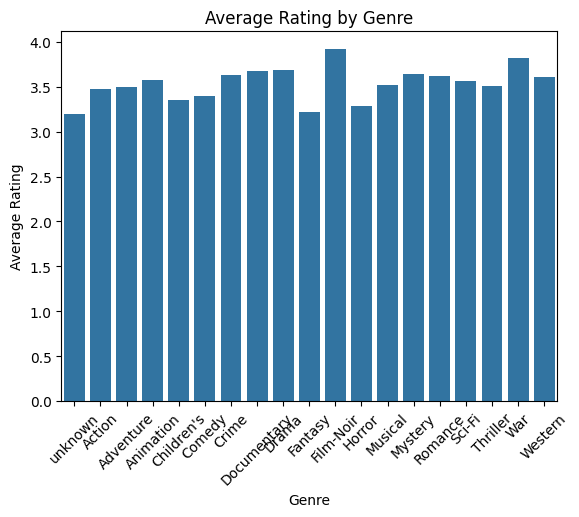

In [ ]:
genre_cols = data.columns[9:28]
average_ratings = {}
for genre_col in genre_cols:
 genre_data = merged_data[merged_data[genre_col] == 1]
 average_rating = genre_data['rating'].mean()
 average_ratings[genre_col] = average_rating

sns.barplot(x=list(average_ratings.keys()), y=list(average_ratings.values()))
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Which genres are the most popular based on the number of ratings received?


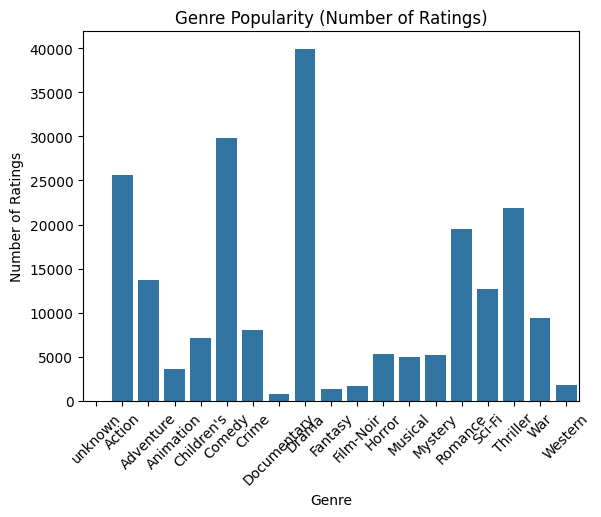

In [ ]:
genre_counts = data[genre_cols].sum()

sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Popularity (Number of Ratings)')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

Which movies (Top-10) have received the highest number of ratings?


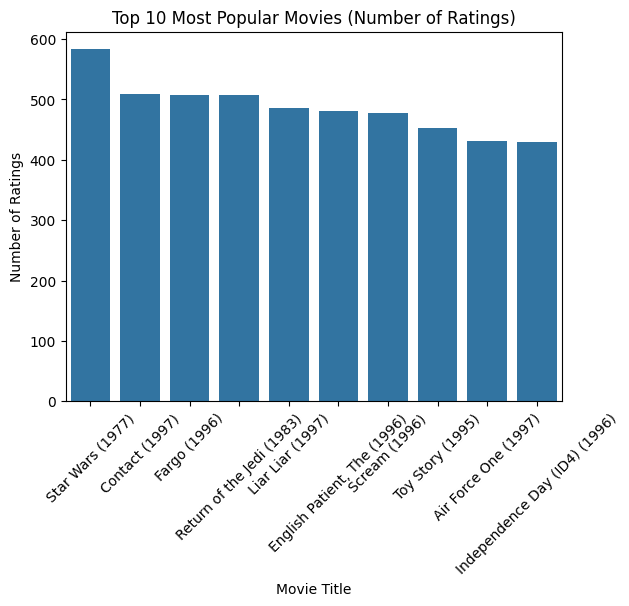

In [ ]:
movie_counts = data['movie_title'].value_counts()
top_10_movies = movie_counts.head(10)
sns.barplot(x=top_10_movies.index, y=top_10_movies.values)
plt.title('Top 10 Most Popular Movies (Number of Ratings)')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

def get_genres(row):
    return [genre for genre in genre_columns if row[genre] == 1]

data['genres'] = data[genre_columns].apply(get_genres, axis=1)

print(data[['movie_title', 'genres']].head())

                                         movie_title  \
0                                       Kolya (1996)   
1                                Men in Black (1997)   
2                Truth About Cats & Dogs, The (1996)   
3                               Birdcage, The (1996)   
4  Adventures of Priscilla, Queen of the Desert, ...   

                                genres  
0                             [Comedy]  
1  [Action, Adventure, Comedy, Sci-Fi]  
2                    [Comedy, Romance]  
3                             [Comedy]  
4                      [Comedy, Drama]  


Are there any significant differences in the preferences for different movie genres between male and female users?


Genre: Action
Male Average Rating: 0.27130352814435765
Female Average Rating: 0.2114219114219114
-----------------------------------
Genre: Adventure
Male Average Rating: 0.14290331268516024
Female Average Rating: 0.12202797202797203
-----------------------------------
Genre: Animation
Male Average Rating: 0.03514678157823862
Female Average Rating: 0.038655788655788656
-----------------------------------
Genre: Children's
Male Average Rating: 0.06665768920010773
Female Average Rating: 0.08671328671328671
-----------------------------------
Genre: Comedy
Male Average Rating: 0.2930783732830595
Female Average Rating: 0.3134421134421134
-----------------------------------
Genre: Crime
Male Average Rating: 0.08431187718825747
Female Average Rating: 0.0696969696969697
-----------------------------------
Genre: Documentary
Male Average Rating: 0.007689200107729599
Female Average Rating: 0.007264957264957265
-----------------------------------
Genre: Drama
Male Average Rating: 0.3889981147320

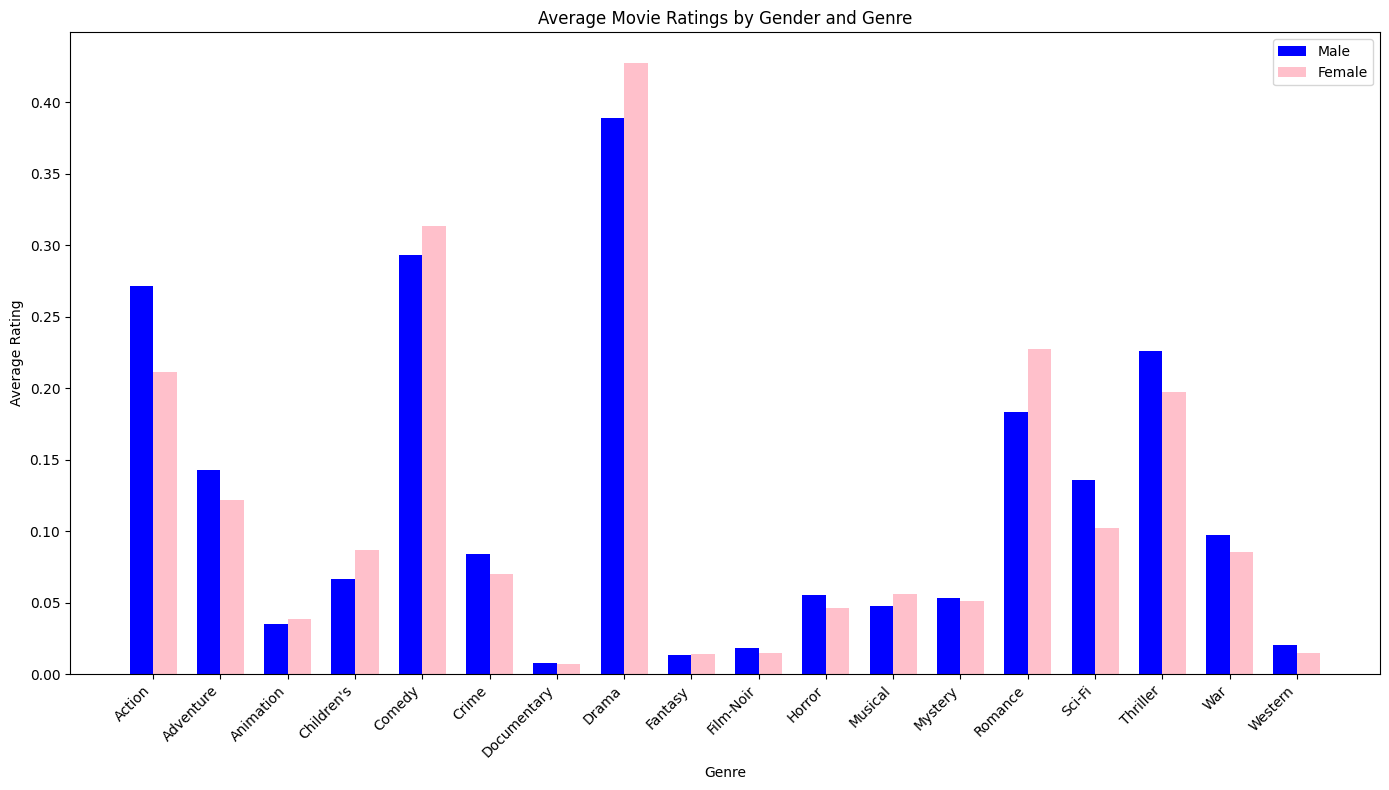

In [ ]:
grouped_data = data.groupby(['gender'])[genre_columns].mean().reset_index()

grouped_data.columns = ['gender'] + [f'{col}_rating' for col in genre_columns]

male_ratings = grouped_data[grouped_data['gender'] == 'M'].iloc[0, 1:].values
female_ratings = grouped_data[grouped_data['gender'] == 'F'].iloc[0, 1:].values

for genre in genre_columns:
    male_avg = grouped_data[grouped_data['gender'] == 'M'][f'{genre}_rating'].values[0]
    female_avg = grouped_data[grouped_data['gender'] == 'F'][f'{genre}_rating'].values[0]
    print(f"Genre: {genre}")
    print(f"Male Average Rating: {male_avg}")
    print(f"Female Average Rating: {female_avg}")
    print("-----------------------------------")

x = np.arange(len(genre_columns))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, male_ratings, width, label='Male', color='blue')
plt.bar(x + width/2, female_ratings, width, label='Female', color='pink')

plt.title('Average Movie Ratings by Gender and Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(x, genre_columns, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

Do male or female users rate more movies on average?


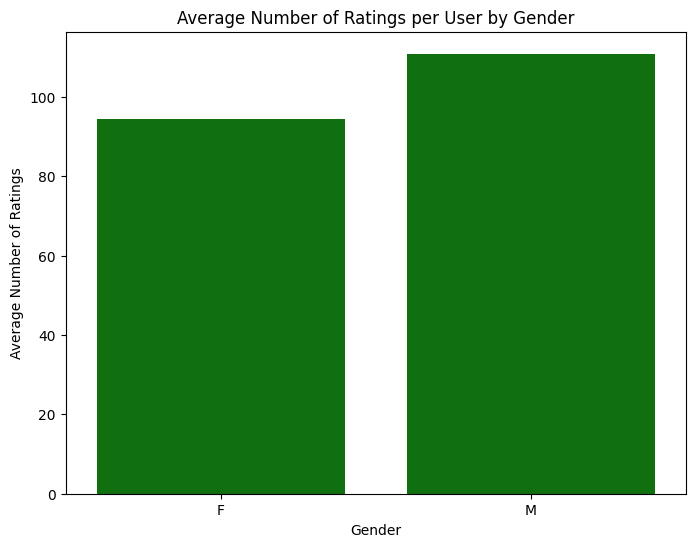

In [ ]:
ratings_count = data.groupby(['user_id', 'gender']).size().reset_index(name='ratings_count')
average_ratings_by_gender = ratings_count.groupby('gender')['ratings_count'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_ratings_by_gender.index, y=average_ratings_by_gender.values, color='green')
plt.title('Average Number of Ratings per User by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Ratings')
plt.show()

Which movies have the highest average ratings within each genre?

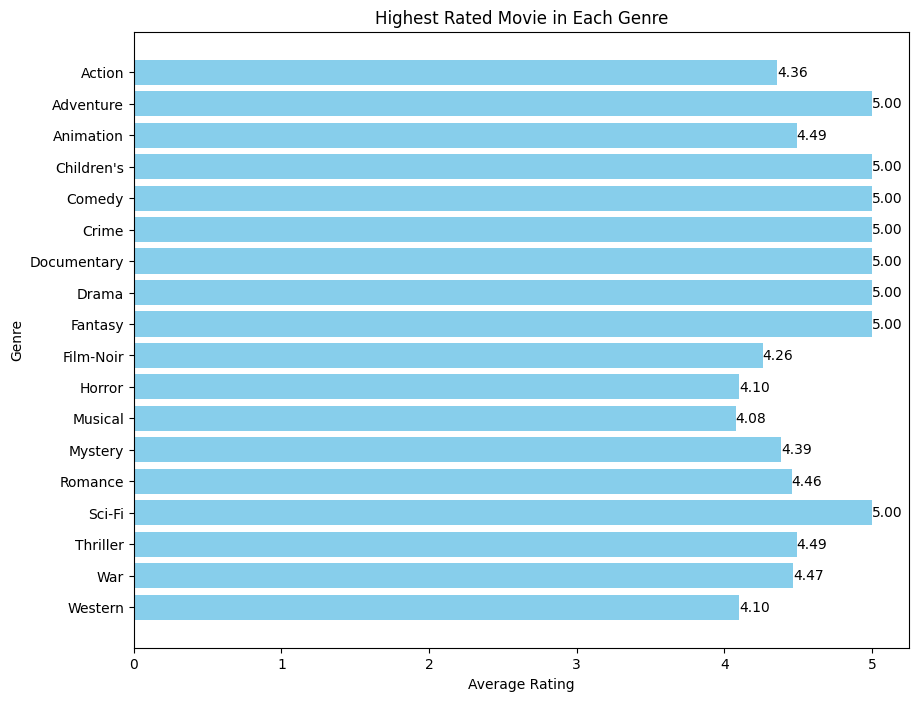

In [ ]:
average_ratings = data.groupby('movie_title')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)
merged_with_genres = pd.merge(average_ratings, items_data, left_on='movie_title', right_on='movie_title', how='inner')
top_movies = {}

for genre in genre_columns:
    genre_movies = merged_with_genres[merged_with_genres[genre] == 1]
    top_movie = genre_movies.loc[genre_movies['average_rating'].idxmax()]
    top_movies[genre] = top_movie

top_movies_df = pd.DataFrame(top_movies).T.reset_index()
top_movies_df = top_movies_df[['index', 'movie_title', 'average_rating']]

plt.figure(figsize=(10, 8))
plt.barh(top_movies_df['index'], top_movies_df['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Highest Rated Movie in Each Genre')
plt.gca().invert_yaxis()
for index, value in enumerate(top_movies_df['average_rating']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

How do ratings vary across different user age groups?

<ipython-input-133-ae3e03c90951>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_ratings = data.groupby('age_group')['rating'].mean().reset_index()


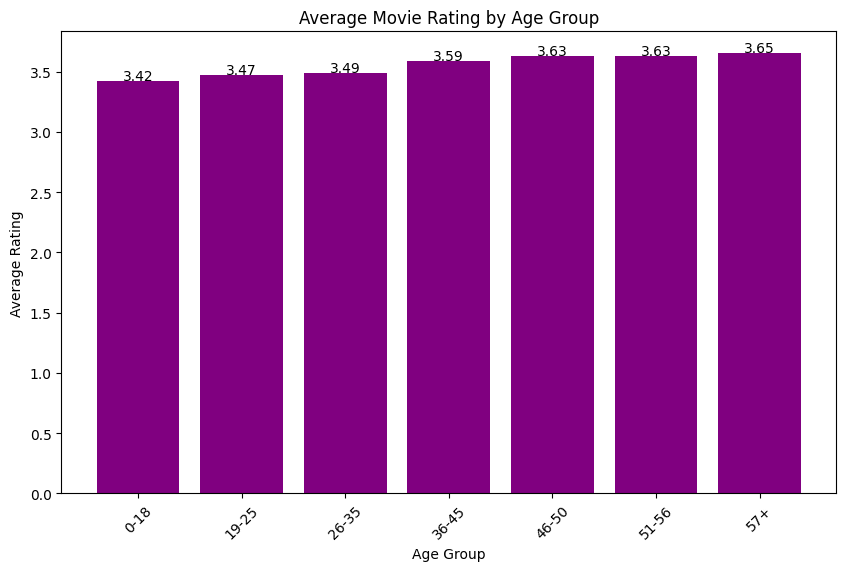

In [ ]:
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-50', '51-56', '57+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

age_group_ratings = data.groupby('age_group')['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(age_group_ratings['age_group'], age_group_ratings['rating'], color='purple')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Age Group')
plt.xticks(rotation=45)
for index, value in enumerate(age_group_ratings['rating']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.show()

How do ratings vary across different user occupations?


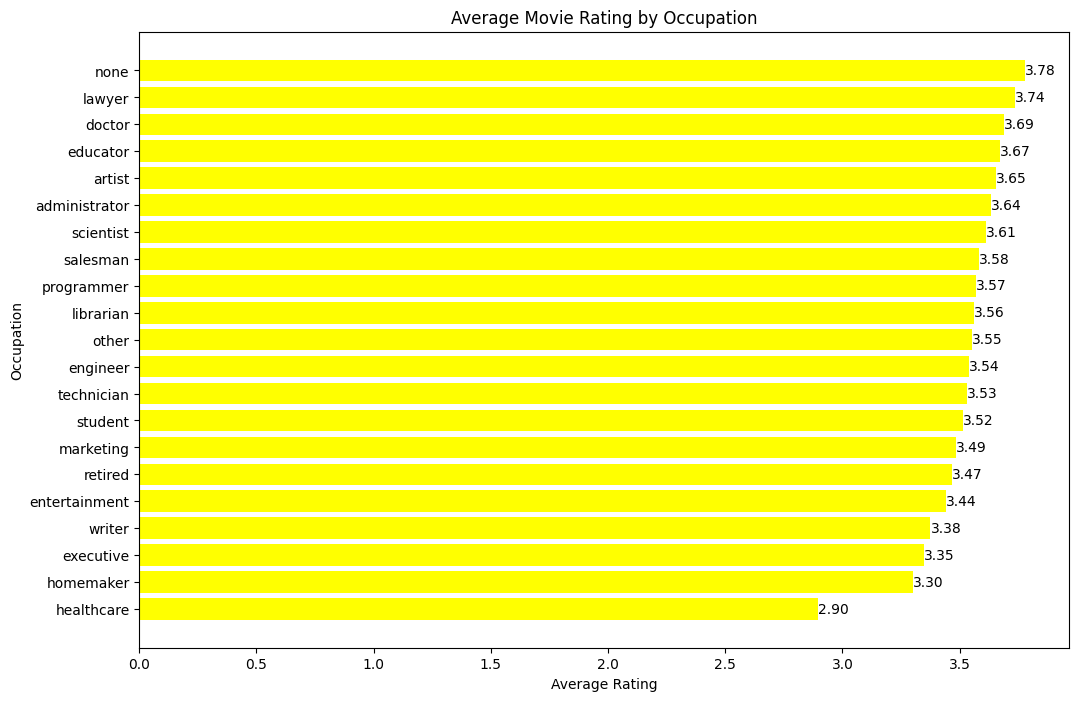

In [ ]:
occupation_ratings = data.groupby('occupation')['rating'].mean().reset_index()

occupation_ratings = occupation_ratings.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(occupation_ratings['occupation'], occupation_ratings['rating'], color='yellow')
plt.xlabel('Average Rating')
plt.ylabel('Occupation')
plt.title('Average Movie Rating by Occupation')
plt.gca().invert_yaxis()
for index, value in enumerate(occupation_ratings['rating']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

Which genres are preferred by different age groups?

<ipython-input-135-0d2b9bee4cf9>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ratings_by_age = genre_data.groupby('age_group')['rating'].mean().reset_index()
<ipython-input-135-0d2b9bee4cf9>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ratings_by_age = genre_data.groupby('age_group')['rating'].mean().reset_index()
<ipython-input-135-0d2b9bee4cf9>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating

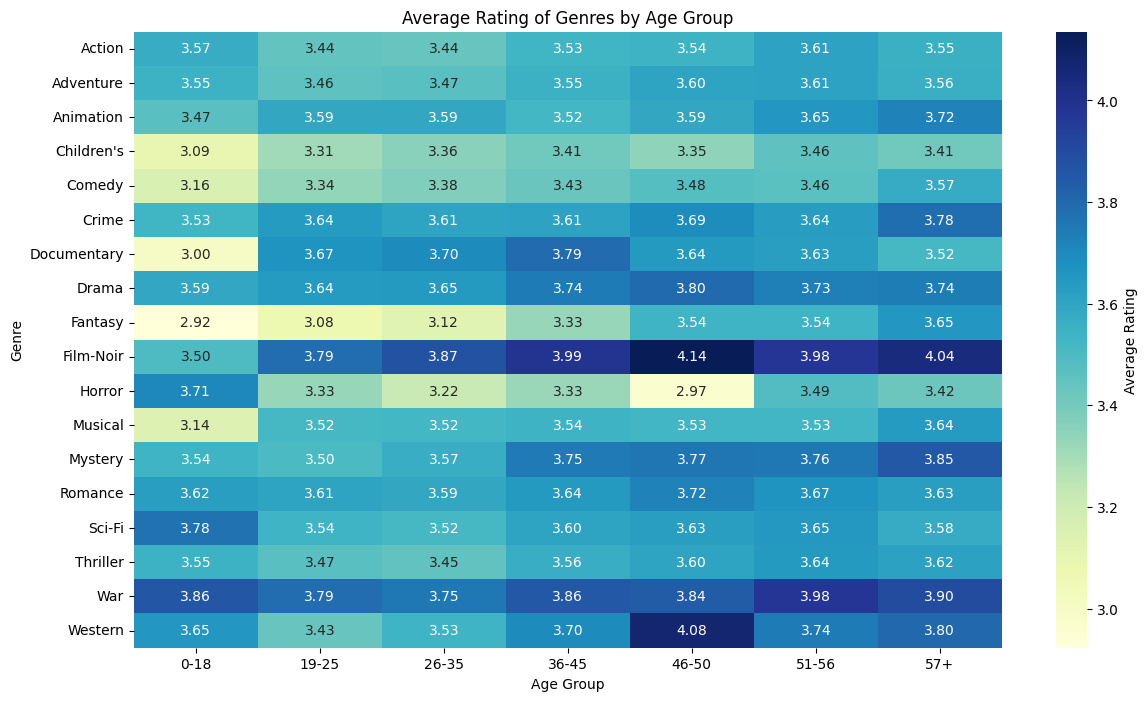

In [ ]:
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-50', '51-56', '57+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

age_genre_ratings = {}

for genre in genre_columns:
    genre_data = data[data[genre] == 1]
    avg_ratings_by_age = genre_data.groupby('age_group')['rating'].mean().reset_index()
    age_genre_ratings[genre] = avg_ratings_by_age.set_index('age_group')['rating']

age_genre_df = pd.DataFrame(age_genre_ratings)

plt.figure(figsize=(14, 8))
sns.heatmap(age_genre_df.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Rating'})
plt.xlabel('Age Group')
plt.ylabel('Genre')
plt.title('Average Rating of Genres by Age Group')
plt.show()

How do user preferences evolve over time? Can we observe any shifts in genre popularity?


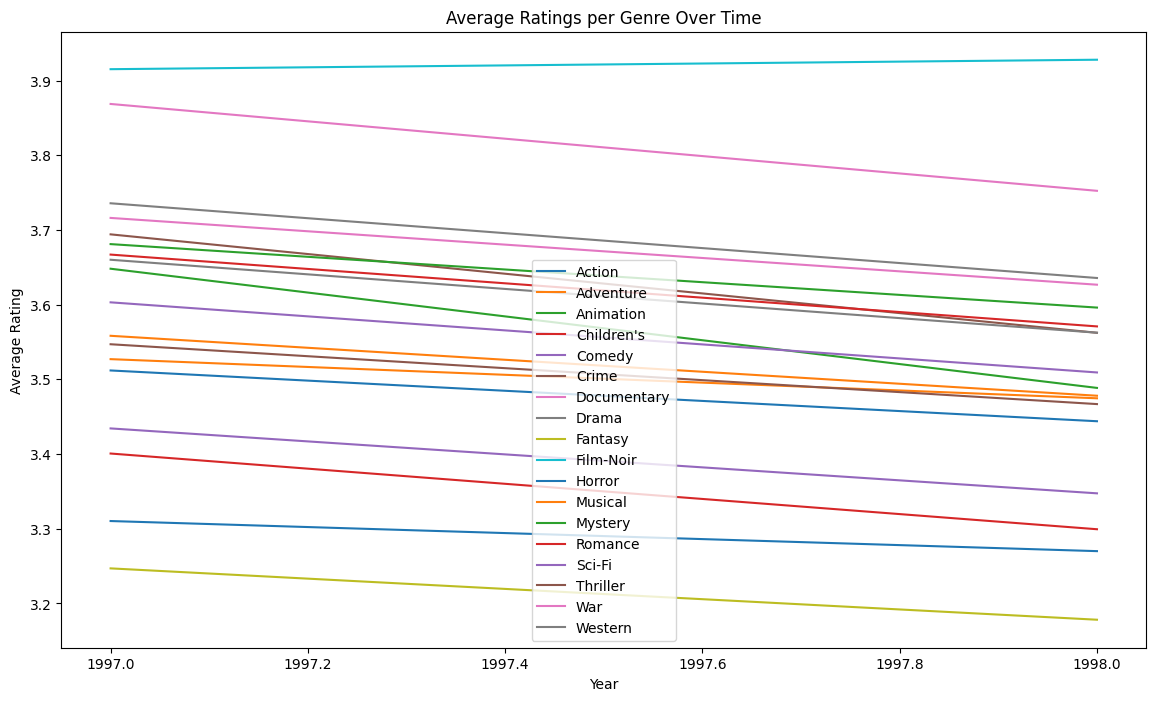

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['year'] = data['timestamp'].dt.year

genre_yearly_ratings = data.explode('genres').groupby(['year', 'genres'])['rating'].mean().unstack().fillna(0)

plt.figure(figsize=(14, 8))
for genre in genre_columns:
    sns.lineplot(data=genre_yearly_ratings[genre], label=genre)

plt.title('Average Ratings per Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.show()